In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import skfuzzy as fuzz

In [36]:
df=pd.read_csv('/content/t20_series.csv')

In [37]:
df.head()

,series,season,winner,margin,series_id
0,Twenty20 Cup,2003,Surrey,NaN,124121
1,Standard Bank Pro20 Series (in South Africa),2003/04,Eagles,NaN,134226
2,Twenty20 Cup (in England),2004,Leics,NaN,134471
3,Twenty-20 Tournament (in Sri Lanka),2004,Chilaw,NaN,304926
4,Australia in New Zealand T20I Match,2004/05,Australia,1-0 (1),238218


In [38]:
df.tail()

,series,season,winner,margin,series_id
368,Pakistan Super League (in Pakistan/United Arab...,2016/17,Zalmi,NaN,1075974
369,Afghanistan v Ireland T20I Series (in India),2016/17,Afghanistan,3-0 (3),1040467
370,Pakistan in West Indies T20I Series,2017,Pakistan,3-1 (4),1077945
371,Bangladesh in Sri Lanka T20I Series,2016/17,drawn,1-1 (2),1083439
372,Indian Premier League (in India),2017,-,NaN,1078425


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   series     373 non-null    object
 1   season     373 non-null    object
 2   winner     373 non-null    object
 3   margin     201 non-null    object
 4   series_id  373 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 14.7+ KB


In [40]:
df.describe()

,series_id
count,3.730000e+02
mean,5.926767e+05
std,2.390318e+05
min,1.241210e+05
25%,4.126710e+05
50%,5.657970e+05
75%,7.567330e+05
max,1.083439e+06


In [42]:
df.shape

(373, 5)

In [47]:
df.isnull().sum()

,0
series,0
season,0
winner,0
margin,172
series_id,0


In [50]:
df=df.drop('margin', axis=1, errors='ignore')

In [44]:
x = df[['series','season','series_id']]
y=df['winner']

In [45]:
x

,series,season,series_id
0,Twenty20 Cup,2003,124121
1,Standard Bank Pro20 Series (in South Africa),2003/04,134226
2,Twenty20 Cup (in England),2004,134471
3,Twenty-20 Tournament (in Sri Lanka),2004,304926
4,Australia in New Zealand T20I Match,2004/05,238218
...,...,...,...
368,Pakistan Super League (in Pakistan/United Arab...,2016/17,1075974
369,Afghanistan v Ireland T20I Series (in India),2016/17,1040467
370,Pakistan in West Indies T20I Series,2017,1077945
371,Bangladesh in Sri Lanka T20I Series,2016/17,1083439


In [46]:
y

,winner
0,Surrey
1,Eagles
2,Leics
3,Chilaw
4,Australia
...,...
368,Zalmi
369,Afghanistan
370,Pakistan
371,drawn


In [52]:
from sklearn.datasets import make_blobs


In [55]:
def partitioning_clustering(X):
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Partitioning Clustering (K-Means)')
    plt.show()

In [56]:
def density_based_clustering(X):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels = dbscan.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Density-Based Clustering (DBSCAN)')
    plt.show()

In [57]:
def distribution_model_based_clustering(X):
    gmm = GaussianMixture(n_components=4, random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Distribution Model-Based Clustering (GMM)')
    plt.show()

In [58]:
def hierarchical_clustering(X):
    Z = linkage(X, method='ward')
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title('Hierarchical Clustering (Dendrogram)')
    plt.show()

In [59]:
def hierarchical_clustering(X):
    Z = linkage(X, method='ward') # Calculate Z
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title('Hierarchical Clustering (Dendrogram)')
    plt.show()

    labels = fcluster(Z, t=4, criterion='maxclust') # Use Z here
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Hierarchical Clustering (Agglomerative)')
    plt.show()

In [60]:
def fuzzy_clustering(X):
    # Transpose data for fuzzy C-means
    data = np.array(X).T

    # Fuzzy C-Means
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data, c=4, m=2.0, error=0.005, maxiter=1000, init=None)

    # Assign labels
    labels = np.argmax(u, axis=0)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title('Fuzzy Clustering (Fuzzy C-Means)')
    plt.show()

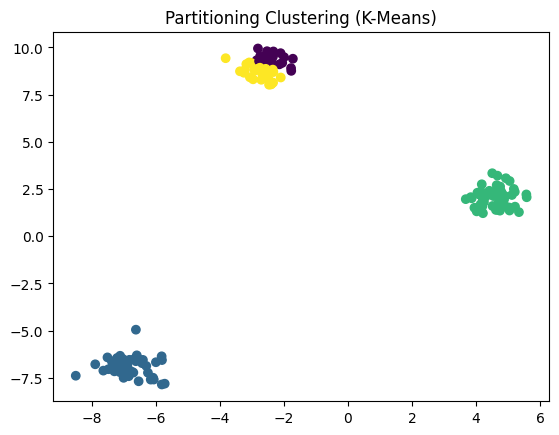

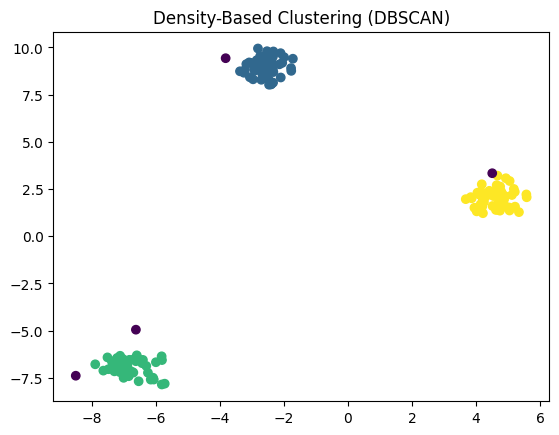

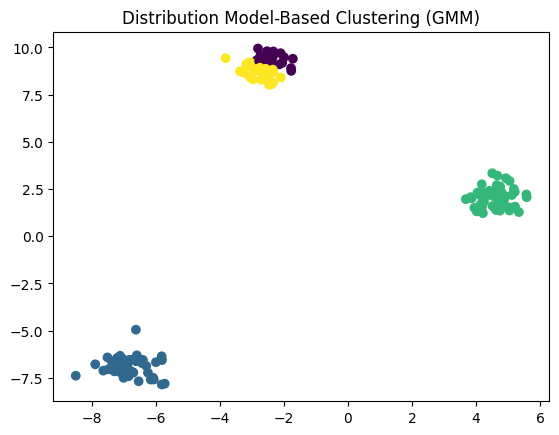

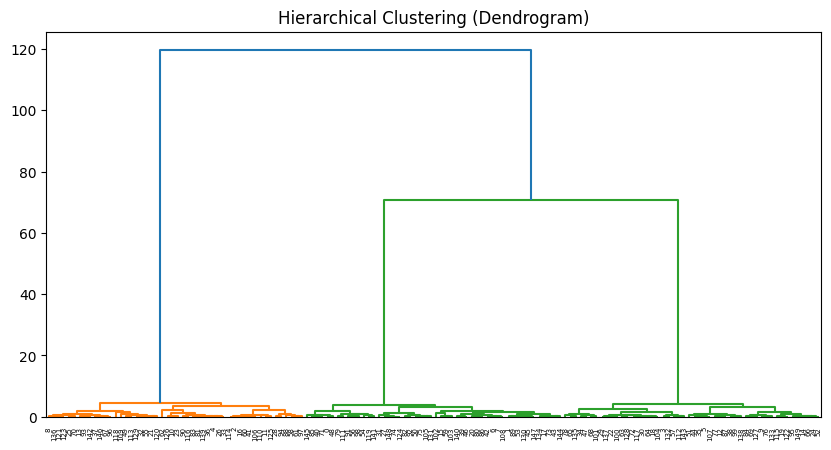

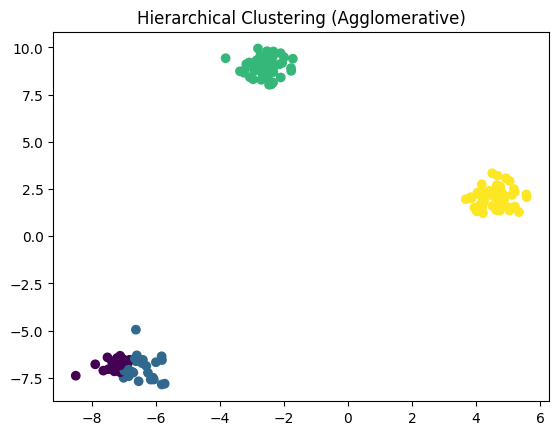

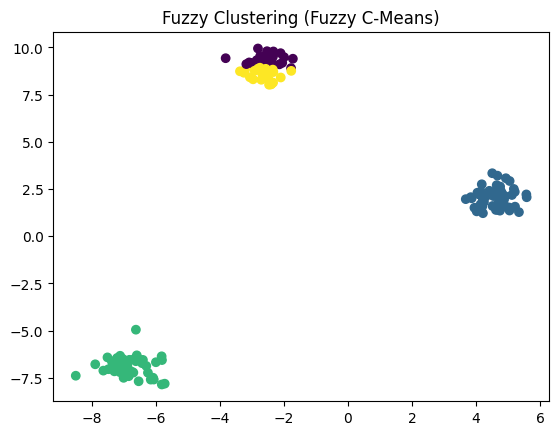

In [61]:
partitioning_clustering(x)
density_based_clustering(x)
distribution_model_based_clustering(x)
hierarchical_clustering(x)
fuzzy_clustering(x)

In [62]:
import pandas as pd

# Convert dataset to pandas DataFrame
df = pd.DataFrame(x, columns=["Feature 1", "Feature 2"])

# Display the first few rows of the dataset
print(df.head())

# Show dataset statistics
print("\nDataset Summary:")
print(df.describe())

# Display total number of points
print("\nTotal Number of Data Points:", len(df))

   Feature 1  Feature 2
0  -2.527111   9.796608
1  -2.928806   8.859680
2  -6.739131  -7.191459
3   5.582972   2.060459
4  -6.622110  -6.623217

Dataset Summary:
        Feature 1   Feature 2
count  150.000000  150.000000
mean    -1.603388    1.377320
std      4.759387    6.526445
min     -8.500261   -7.856153
25%     -6.462354   -6.553072
50%     -2.578431    2.105479
75%      4.197243    8.682386
max      5.582972    9.940425

Total Number of Data Points: 150
